# Clustering de Jugadores

El objetivo de este script es agrupar todos los jugadores mediante el uso de _machine learning_ no supervisado. De esta forma, se obtendrán cinco grupos los cuales corresponderán a las posiciones en el baloncesto.  
Así, se podría trabajar con grandes cantidades de jugadores y hacer filtros en función de cualquier necesidad vacante.

In [1]:
# Primero se importan las librerías
import os
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import datasets

A continuación, se carga el archivo CSV y se comprueba que los datos están bien.

In [2]:
# A continuación se cargan los datos
wdir = os.path.dirname(os.path.realpath('__file__'))
leb_oro = pd.read_csv(wdir+'/../scrapper/clustering/out.csv')

# Comprobamos que los datos son correctos
leb_oro.head(10)

,#,Player,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,...,BLK%,USG%,PPR,PPS,ORtg,DRtg,eDiff,FIC,PER,POS
0,2,Johnny Dee,ARAB,34,28.7,5.5,12.1,0.457,2.8,6.0,...,0.0,23.2,1.2,1.3,126.5,116.4,10.1,333.8,20.4,1
1,9,Reggie Johnson,OUR,34,30.0,5.7,12.8,0.443,1.4,4.4,...,0.1,27.5,-2.7,1.2,103.4,109.0,-5.6,227.6,15.6,0
2,5,Alec Wintering,ARAB,34,31.7,5.4,12.0,0.447,0.8,2.1,...,0.3,24.8,2.4,1.3,109.0,114.9,-5.9,340.1,17.7,0
3,3,Volodymyr Herun,FCB,30,29.3,5.4,10.7,0.500,0.0,0.5,...,2.6,23.3,-0.5,1.4,119.7,107.3,12.4,372.8,21.9,4
4,6,Sergio De La Fuente,VAL,37,28.3,5.5,11.8,0.465,1.1,3.3,...,0.5,26.4,-4.4,1.2,108.8,105.8,3.0,338.9,19.5,3
5,1,Caleb Agada,PRA,42,25.0,5.3,12.0,0.444,0.8,3.1,...,0.5,31.6,-1.8,1.2,107.5,92.8,14.7,357.1,23.3,1
6,3,Henri Wade-Chatman,VAL,37,25.7,5.1,12.0,0.427,1.3,3.8,...,0.1,30.2,-1.0,1.2,105.8,110.1,-4.3,242.5,18.0,0
7,4,Warren Ward,CAC,20,26.7,5.0,11.4,0.443,2.3,6.0,...,0.4,26.2,-1.6,1.2,108.8,111.0,-2.3,149.4,17.1,2
8,6,Brano Dukanovic,FOR,34,26.3,4.6,11.3,0.408,1.9,5.1,...,0.2,28.9,-2.7,1.2,106.5,115.7,-9.2,195.9,16.3,2
9,4,Evan Yates,KRC,34,30.8,5.7,10.3,0.556,0.1,0.3,...,1.2,22.5,-1.9,1.3,112.3,109.9,2.4,409.1,20.5,3


_Para facilitar el trabajo de selección de datos y escritura de las columnas, se muestra una lista de estas para copiar y pegar a continuación_

In [3]:
leb_oro.columns

Index(['#', 'Player', 'Team', 'GP', 'MPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'TOV', 'PF', 'ORB', 'DRB', 'RPG', 'APG',
       'SPG', 'BPG', 'PPG', 'TS%', 'eFG%', 'Total S %', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'TOV%', 'STL%', 'BLK%', 'USG%', 'PPR', 'PPS', 'ORtg', 'DRtg',
       'eDiff', 'FIC', 'PER', 'POS'],
      dtype='object')

In [4]:
data = leb_oro[['GP', 'MPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'TOV', 'PF', 'ORB', 'DRB', 'RPG', 'APG',
       'SPG', 'BPG', 'PPG', 'TS%', 'eFG%', 'Total S %', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'TOV%', 'STL%', 'BLK%', 'USG%', 'PPR', 'PPS', 'ORtg', 'DRtg',
       'eDiff', 'FIC', 'PER', 'POS']]

Para tener una primera idea de la dispersión de los jugadores, estos se agrupan según su posición oficial y se muestran gráficos.

In [5]:
# Se agrupan los datos por posición
data.groupby('POS').mean()

,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,STL%,BLK%,USG%,PPR,PPS,ORtg,DRtg,eDiff,FIC,PER
POS,,,,,,,,,,,,,,,,,,,,,
0,34.000000,23.925000,3.042857,7.375000,0.408464,1.203571,3.389286,0.357821,1.428571,1.896429,...,2.600000,0.228571,20.157143,1.632143,1.185714,105.757143,108.596429,-2.842857,203.850000,13.542857
1,36.172414,23.341379,3.241379,7.682759,0.418931,1.400000,3.827586,0.353828,1.413793,1.786207,...,2.110345,0.431034,20.244828,-0.451724,1.203448,108.741379,109.772414,-1.041379,188.551724,13.596552
2,34.928571,22.196429,3.117857,7.389286,0.421143,1.071429,3.235714,0.320536,1.257143,1.689286,...,1.800000,0.889286,20.003571,-1.510714,1.150000,106.117857,109.675000,-3.553571,180.342857,13.392857
3,35.903226,22.119355,3.380645,7.000000,0.481581,0.545161,1.654839,0.283806,1.509677,2.135484,...,1.741935,1.945161,20.129032,-2.509677,1.264516,110.093548,106.700000,3.390323,242.793548,16.196774
4,34.391304,20.386957,3.182609,5.952174,0.528043,0.130435,0.439130,0.227000,1.547826,2.256522,...,1.452174,2.717391,19.882609,-3.639130,1.313043,110.126087,106.826087,3.308696,226.195652,16.952174


(array([28.,  0., 29.,  0.,  0., 28.,  0., 31.,  0., 23.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

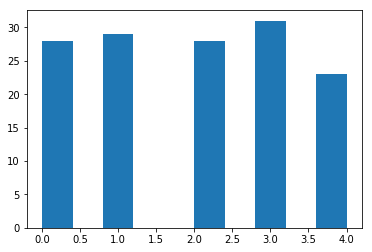

In [6]:
# Se genera el gráfico de columnas
plt.hist(leb_oro['POS'])

### Clustering Jerárquico
La finalidad de este clustering es encontrar la mejor disposición de los elementos en un número de grupos N dado. De esta forma, agrupará a los elementos en función de sus características de la forma más óptima posible. El modelo asigna a cada grupo unas propiedades que determinan a sus miembros.  
En consecuencia, se obtendrán 5 grupos que corresponderán a cada posición del baloncesto.

In [7]:
# Primero es necesario normalizar los datos
data_norm = (data-data.min())/(data.max()-data.min())
# Se muestra la cabecera de la tabla para confirmar
data_norm.head()

,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,BLK%,USG%,PPR,PPS,ORtg,DRtg,eDiff,FIC,PER,POS
0,0.641026,0.815951,0.958333,0.933962,0.438438,1.000000,1.000000,0.473,0.486486,0.388889,...,0.000000,0.621622,0.522876,0.500,0.833333,0.822300,0.586992,0.485189,0.689320,0.25
1,0.641026,0.895706,1.000000,1.000000,0.396396,0.500000,0.733333,0.313,0.567568,0.518519,...,0.016949,0.815315,0.267974,0.375,0.339744,0.564460,0.331707,0.309449,0.456311,0.00
2,0.641026,1.000000,0.937500,0.924528,0.408408,0.285714,0.350000,0.371,0.864865,0.870370,...,0.050847,0.693694,0.601307,0.500,0.459402,0.770035,0.326829,0.495615,0.558252,0.00
3,0.538462,0.852761,0.937500,0.801887,0.567568,0.000000,0.083333,0.071,1.000000,1.000000,...,0.440678,0.626126,0.411765,0.625,0.688034,0.505226,0.624390,0.549727,0.762136,1.00
4,0.717949,0.791411,0.958333,0.905660,0.462462,0.392857,0.550000,0.336,0.594595,0.611111,...,0.084746,0.765766,0.156863,0.375,0.455128,0.452962,0.471545,0.493629,0.645631,0.75


Ahora comienza el _machine learning_ con clustering jerárquico.  
Se especificará un número de clusters 5, los cuales cada uno identificará a cada posicion de juego.

In [8]:
# Se genera el modelo y se le muestran los datos normalizados
clus = AgglomerativeClustering(n_clusters=5, linkage="ward").fit(data_norm)

Una vez creado el modelo, lo ídoneo es representar la misma gráfica que antes pero con los nuevos datos.

(array([35.,  0., 28.,  0.,  0., 33.,  0., 14.,  0., 29.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

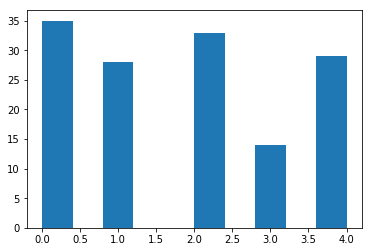

In [9]:
md = pd.Series(clus.labels_)
plt.hist(md)

### Clustering K-Mean
Este tipo de clustering que como objetivo la separación de un conjunto de elementos (jugadores) en k grupos en el que cada jugador pertenece al grupo cuyo valor medio es más cercano. La diferencia de este tipo de clustering con el anterior es que en este los elementos no atienden a unas propiedades comunes, sino a una media común.

In [10]:
# Se crea el modelo con el número de clusters de posiciones
model = KMeans(n_clusters=5)
# Se entrena con los datos normalizados
model.fit(data_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Se hace igual que en el anterior método, se muestra el gráfico.

(array([36.,  0., 31.,  0.,  0., 13.,  0., 24.,  0., 35.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

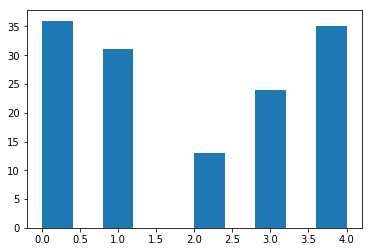

In [11]:
md_k = pd.Series(model.labels_)
plt.hist(md_k)

A continuación, se añaden estas dos nuevas columnas de clustering a la tabla.

In [12]:
leb_oro['clust_j'] = md
leb_oro['clust_k'] = md_k
# Se muestra la cabecera
leb_oro.head()

,#,Player,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,...,PPR,PPS,ORtg,DRtg,eDiff,FIC,PER,POS,clust_j,clust_k
0,2,Johnny Dee,ARAB,34,28.7,5.5,12.1,0.457,2.8,6.0,...,1.2,1.3,126.5,116.4,10.1,333.8,20.4,1,3,4
1,9,Reggie Johnson,OUR,34,30.0,5.7,12.8,0.443,1.4,4.4,...,-2.7,1.2,103.4,109.0,-5.6,227.6,15.6,0,3,4
2,5,Alec Wintering,ARAB,34,31.7,5.4,12.0,0.447,0.8,2.1,...,2.4,1.3,109.0,114.9,-5.9,340.1,17.7,0,3,4
3,3,Volodymyr Herun,FCB,30,29.3,5.4,10.7,0.500,0.0,0.5,...,-0.5,1.4,119.7,107.3,12.4,372.8,21.9,4,0,2
4,6,Sergio De La Fuente,VAL,37,28.3,5.5,11.8,0.465,1.1,3.3,...,-4.4,1.2,108.8,105.8,3.0,338.9,19.5,3,3,2


Finalmente se hacen las medias de las posiciones y de las nuevas columnas.

In [13]:
leb_oro.groupby('POS').mean()

,#,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,USG%,PPR,PPS,ORtg,DRtg,eDiff,FIC,PER,clust_j,clust_k
POS,,,,,,,,,,,,,,,,,,,,,
0,14.5,34.000000,23.925000,3.042857,7.375000,0.408464,1.203571,3.389286,0.357821,1.428571,...,20.157143,1.632143,1.185714,105.757143,108.596429,-2.842857,203.850000,13.542857,1.464286,1.750000
1,15.0,36.172414,23.341379,3.241379,7.682759,0.418931,1.400000,3.827586,0.353828,1.413793,...,20.244828,-0.451724,1.203448,108.741379,109.772414,-1.041379,188.551724,13.596552,3.137931,2.517241
2,14.5,34.928571,22.196429,3.117857,7.389286,0.421143,1.071429,3.235714,0.320536,1.257143,...,20.003571,-1.510714,1.150000,106.117857,109.675000,-3.553571,180.342857,13.392857,2.642857,1.464286
3,16.0,35.903226,22.119355,3.380645,7.000000,0.481581,0.545161,1.654839,0.283806,1.509677,...,20.129032,-2.509677,1.264516,110.093548,106.700000,3.390323,242.793548,16.196774,1.290323,1.741935
4,12.0,34.391304,20.386957,3.182609,5.952174,0.528043,0.130435,0.439130,0.227000,1.547826,...,19.882609,-3.639130,1.313043,110.126087,106.826087,3.308696,226.195652,16.952174,0.260870,2.260870


In [14]:
leb_oro.groupby('clust_k').mean()

,#,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,USG%,PPR,PPS,ORtg,DRtg,eDiff,FIC,PER,POS,clust_j
clust_k,,,,,,,,,,,,,,,,,,,,,
0,20.250000,36.305556,19.766667,2.444444,5.816667,0.424167,0.727778,2.347222,0.316028,0.891667,...,17.972222,-1.591667,1.130556,104.786111,108.452778,-3.666667,163.661111,12.311111,2.444444,2.194444
1,18.774194,34.548387,21.951613,2.425806,6.096774,0.399065,1.045161,3.041935,0.346194,1.119355,...,18.429032,1.309677,1.161290,103.832258,108.832258,-5.000000,165.496774,11.887097,0.354839,1.483871
2,3.384615,36.076923,25.330769,4.730769,8.669231,0.551692,0.184615,0.646154,0.217692,2.484615,...,22.746154,-2.269231,1.415385,117.807692,104.030769,13.800000,379.500000,22.038462,3.230769,0.230769
3,13.250000,33.500000,20.500000,3.141667,6.033333,0.521875,0.170833,0.537500,0.219083,1.462500,...,19.995833,-3.904167,1.304167,109.441667,107.695833,1.737500,205.658333,16.425000,3.583333,0.166667
4,9.885714,35.200000,25.985714,4.125714,9.548571,0.431829,1.688571,4.508571,0.373629,1.840000,...,22.828571,-0.894286,1.237143,110.931429,109.842857,1.080000,230.371429,15.660000,1.228571,3.428571


In [15]:
leb_oro.groupby('clust_j').mean()

,#,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,USG%,PPR,PPS,ORtg,DRtg,eDiff,FIC,PER,POS,clust_k
clust_j,,,,,,,,,,,,,,,,,,,,,
0,9.857143,34.428571,22.025714,3.628571,6.751429,0.536429,0.140000,0.451429,0.238629,1.805714,...,20.665714,-3.414286,1.351429,112.285714,106.091429,6.197143,266.531429,18.340000,3.514286,2.571429
1,17.607143,34.000000,21.903571,2.442857,6.075000,0.403179,1.003571,2.935714,0.344714,1.139286,...,18.460714,1.535714,1.167857,104.314286,107.978571,-3.664286,172.600000,12.257143,0.214286,1.071429
2,20.424242,36.090909,20.115152,2.581818,6.072727,0.427364,0.724242,2.330303,0.290727,0.927273,...,18.400000,-1.921212,1.133333,104.381818,108.793939,-4.412121,169.809091,12.557576,2.606061,0.424242
3,4.285714,33.428571,27.800000,4.971429,11.250000,0.441786,1.707143,4.542857,0.369643,2.421429,...,26.028571,-0.971429,1.250000,110.050000,109.535714,0.507143,273.950000,18.157143,1.071429,3.857143
4,15.413793,36.793103,23.644828,3.251724,7.786207,0.417241,1.496552,4.117241,0.362103,1.344828,...,20.037931,-0.610345,1.200000,110.196552,110.324138,-0.134483,184.624138,13.337931,1.379310,2.793103


## Conclusiones
Una vez realizado el análisis con estos dos modelos, se pueden apreciar discrepancias en las medias de los modelos con respecto de los valores oficiales.  

De esta forma, ahora cada jugador tiene dos posiciones alternativas en función de sus características, las cuales podrían brindarle mayor versatilidad al entrenador en el juego.  
Y puede obtener a los mejores jugadores de una liga sin tener que observarlos partido a partido.

In [16]:
# Por ejemplo, se pueden agrupar a los jugadores filtrando la posición 1 (escolta) y ordenando los four factors más influyentes
leb_oro[leb_oro.POS==1].sort_values(['eFG%','TOV%', 'ORB%', 'FT%'], ascending=[False, False,False,False])

,#,Player,Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,...,PPR,PPS,ORtg,DRtg,eDiff,FIC,PER,POS,clust_j,clust_k
23,4,Salva Arco,BRE,34,24.5,4.0,8.0,0.502,1.9,4.0,...,0.4,1.5,125.4,106.8,18.5,250.4,17.5,1,4,4
58,18,Davis Geks,OCB,39,25.5,2.8,6.2,0.449,1.7,4.1,...,0.8,1.4,129.2,112.7,16.5,189.5,12.9,1,4,4
17,3,Carles Bivia,PAE,34,29.2,4.6,9.7,0.474,2.1,5.2,...,-0.2,1.3,113.9,114.1,-0.2,291.8,18.3,1,3,4
26,5,Diego Kapelan,MEL,48,20.9,3.9,8.8,0.440,2.4,5.5,...,-0.8,1.3,115.5,109.3,6.2,257.5,17.4,1,4,4
0,2,Johnny Dee,ARAB,34,28.7,5.5,12.1,0.457,2.8,6.0,...,1.2,1.3,126.5,116.4,10.1,333.8,20.4,1,3,4
21,13,Greg Gantt,VAL,37,25.9,4.3,9.2,0.465,1.9,4.4,...,-2.7,1.3,116.5,113.9,2.6,180.6,14.2,1,4,4
94,23,Eduardo Duran,MEL,47,20.7,2.5,5.9,0.419,1.6,3.8,...,-0.9,1.2,110.6,109.1,1.5,161.5,11.1,1,4,1
47,11,Luis Parejo,CAC,31,26.8,3.2,7.9,0.406,2.1,5.5,...,0.6,1.2,115.3,111.3,3.9,226.5,14.6,1,4,4
112,10,Sergi Quintela,BRE,34,17.0,2.1,4.7,0.453,0.8,2.2,...,1.3,1.3,118.7,102.9,15.8,145.9,14.8,1,1,1
89,21,Ben Mockford,PAE,33,19.4,2.5,6.4,0.400,1.7,4.6,...,-0.4,1.2,109.8,119.7,-10.0,103.6,12.2,1,4,1


En la tabla de arriba tiene ordenados a los mejores jugadores, y con la opción de ver que posición le correspondería por Clustering Jerárquico y por Clustering K-Means.  
Y esto se puede extender a otros factores como el PPG y el PER que son medidores generales del jugador.